In [1]:

import pandas as pd



In [2]:
p_day=7

In [46]:
df=pd.read_csv("TATAMOTORS.csv")
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [47]:
len(df)

3371

In [48]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,142.189911,146.884857,141.231750,146.089584,130.937164,6914777
1,2008-01-02,146.951920,152.729584,144.297836,152.068466,136.295959,10611582
2,2008-01-03,153.304474,156.370575,149.481445,151.694778,135.960999,10581493
3,2008-01-04,153.304474,157.922775,147.775940,149.788055,134.252029,9271718
4,2008-01-07,150.046753,154.799194,146.214142,150.506668,134.896149,7606509


In [49]:
df1=df.reset_index()['Close']

In [50]:
df1

0       146.089584
1       152.068466
2       151.694778
3       149.788055
4       150.506668
           ...    
3366    301.200012
3367    306.100006
3368    311.950012
3369    311.649994
3370    308.600006
Name: Close, Length: 3371, dtype: float64

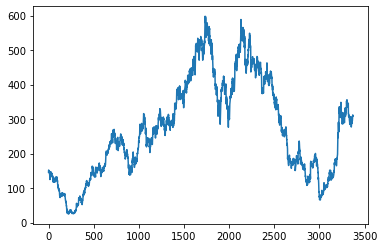

In [51]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [52]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [53]:
import numpy as np

In [54]:
df1

0       146.089584
1       152.068466
2       151.694778
3       149.788055
4       150.506668
           ...    
3366    301.200012
3367    306.100006
3368    311.950012
3369    311.649994
3370    308.600006
Name: Close, Length: 3371, dtype: float64

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [56]:
print(df1)

[[0.2113144 ]
 [0.22174579]
 [0.22109382]
 ...
 [0.50069219]
 [0.50016875]
 [0.49484741]]


In [57]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [58]:
training_size,test_size

(2191, 1180)

In [59]:
train_data

array([[0.2113144 ],
       [0.22174579],
       [0.22109382],
       ...,
       [0.71171443],
       [0.72288054],
       [0.72602105]])

In [60]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [61]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = p_day
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [62]:
print(X_train.shape), print(y_train.shape)

(2183, 7)
(2183,)


(None, None)

In [63]:
print(X_test.shape), print(ytest.shape)

(1172, 7)
(1172,)


(None, None)

In [64]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [66]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(p_day,1)))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 50)             10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [68]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=15,batch_size=100,verbose=2)

Epoch 1/15
22/22 - 7s - loss: 0.1052 - val_loss: 0.0193
Epoch 2/15
22/22 - 1s - loss: 0.0259 - val_loss: 0.0033
Epoch 3/15
22/22 - 1s - loss: 0.0133 - val_loss: 0.0020
Epoch 4/15
22/22 - 1s - loss: 0.0114 - val_loss: 7.4915e-04
Epoch 5/15
22/22 - 1s - loss: 0.0095 - val_loss: 7.2603e-04
Epoch 6/15
22/22 - 0s - loss: 0.0084 - val_loss: 7.3833e-04
Epoch 7/15
22/22 - 1s - loss: 0.0082 - val_loss: 7.3742e-04
Epoch 8/15
22/22 - 0s - loss: 0.0089 - val_loss: 8.1874e-04
Epoch 9/15
22/22 - 1s - loss: 0.0075 - val_loss: 9.0346e-04
Epoch 10/15
22/22 - 0s - loss: 0.0073 - val_loss: 0.0018
Epoch 11/15
22/22 - 1s - loss: 0.0068 - val_loss: 9.4242e-04
Epoch 12/15
22/22 - 0s - loss: 0.0070 - val_loss: 7.1389e-04
Epoch 13/15
22/22 - 0s - loss: 0.0071 - val_loss: 8.1758e-04
Epoch 14/15
22/22 - 1s - loss: 0.0064 - val_loss: 0.0011
Epoch 15/15
22/22 - 1s - loss: 0.0061 - val_loss: 7.3396e-04


In [69]:
import tensorflow as tf

In [70]:
tf.__version__

'2.6.0'

In [71]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [72]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [73]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

303.16729847019695

In [74]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

289.69121276290934

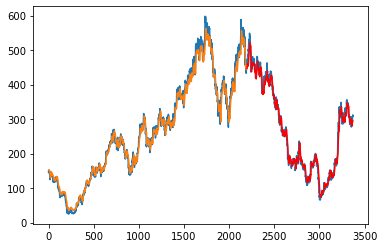

In [75]:
### Plotting 
# shift train predictions for plotting
look_back=p_day
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot,color="red")
plt.show()

In [76]:
len(test_data)

1180

In [77]:
x_input=test_data[len(test_data)-p_day-1:].reshape(1,-1)
x_input.shape


(1, 8)

In [78]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [79]:
len(temp_input)

8

In [80]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=p_day
futureDays=5
i=0

while(i<futureDays):
    
    if(len(temp_input)>p_day):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.47155557 0.478011   0.48193659 0.49048565 0.50069219 0.50016875
 0.49484741]
0 day output [[0.47599956]]
1 day input [0.478011   0.48193659 0.49048565 0.50069219 0.50016875 0.49484741
 0.47599956]
1 day output [[0.48137745]]
2 day input [0.48193659 0.49048565 0.50069219 0.50016875 0.49484741 0.47599956
 0.48137745]
2 day output [[0.485565]]
3 day input [0.49048565 0.50069219 0.50016875 0.49484741 0.47599956 0.48137745
 0.48556501]
3 day output [[0.48892975]]
4 day input [0.50069219 0.50016875 0.49484741 0.47599956 0.48137745 0.48556501
 0.48892975]
4 day output [[0.48932713]]
[[0.4759995639324188], [0.4813774526119232], [0.4855650067329407], [0.48892974853515625], [0.4893271327018738]]


In [81]:
day_new=np.arange(1,futureDays+1)
day_pred=np.arange(p_day+1,p_day+1+futureDays)

In [82]:
import matplotlib.pyplot as plt

In [83]:
len(df1)

3371

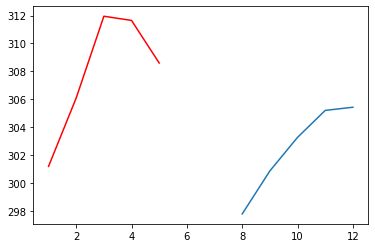

In [84]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-futureDays:]),color="red")
plt.plot(day_pred,scaler.inverse_transform(lst_output))

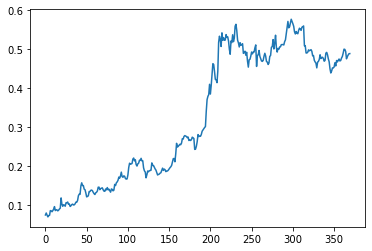

In [85]:
df3=df1.tolist()
df3.extend(lst_output)


plt.plot(df3[len(df1)-365:])

In [86]:
df3=scaler.inverse_transform(df3).tolist()
df4 = pd.DataFrame(df3,columns =['Close'])
df4


,Close
0,146.089584
1,152.068466
2,151.694778
3,149.788055
4,150.506668
...,...
3371,297.797130
3372,300.879533
3373,303.279681
3374,305.208224


In [ ]:
plt.plot(df4["Close"][5:])
plt.show()

In [ ]:
df_temp = pd.read_csv("RELIANCEtemp.csv")
plt.plot(df3,color="red")
plt.plot(df_temp["Close"])
plt.show()

print(df3[-31:-23])
print(df_temp["Close"][-31:])